# Power-ON Reset Circuit Anaylsis
We will determine when a microcontroller will reset after a **power-on-reset** circuit is activated. To do this, we will first define a function that will simulate the output of a RC circuit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def RC_Output(t, R=10E3, C=100E-9, Vin=5.0):
    tau = R*C
    Vout = Vin*(1-np.exp(-t/tau))
    return Vout, tau

## Setup
This function returns the output voltage and the RC constant . We will use 150 *points* for our simulation. The input voltage $V_(in)$ is set to 5V. The **RESET** high and low thresholds are set to 4.5 and 1.3 volts respectively ($V_{HTH} and $V_{LTH}).

In [2]:
N = 150
t = np.linspace(0, 10E-3, N)
V_HTH = 4.5
V_LTH = 1.3
Vin = 5.0

## Simulation
The simulation was done by producing *additive Gaussian noise*. This was added to the voltage output from the RC network to simulate realistic conditions.

In [3]:
noise_pwr = 0.01
noise = (noise_pwr**2)*np.random.randn(N)
V, tau_value = RC_Output(t, Vin=Vin)
V = V + noise

Here, we will search the simulation vector where we are in the *reset* and *running* states ($V<V_{LTH}$, and $V>V_{HTH}$ respectively). From this, we will be able to detect *when* the reset condition will end, and *when* the processor should start running.

In [4]:
RESET_idx = np.where(V<V_LTH)[0]
RUNNING_idx = np.where(V>V_HTH)[0]
Time_EOR = t[RESET_idx][-1]
Time_SOR = t[RUNNING_idx][0]

We will assume that internally, the reset condition is based on an internal comperator. This said, we will produce a logical condition for the reset state.

In [5]:
VLogic = np.zeros(len(RESET_idx))
VLogic = Vin*np.append(VLogic, np.ones(N-len(RESET_idx)))

With these results, we can plot a simulation output.

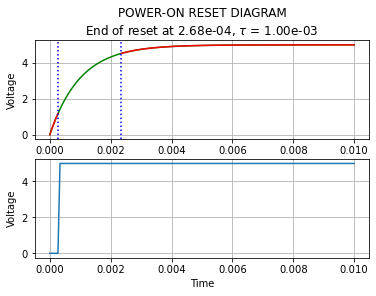

In [6]:
plt.subplot(2, 1, 1)
plt.plot(t, V, 'g')
plt.plot(t[RESET_idx], V[RESET_idx], 'r-')
plt.plot(t[RUNNING_idx], V[RUNNING_idx], 'r-')
plt.axvline(Time_EOR, color='b', linestyle=':')
plt.axvline(Time_SOR, color='b', linestyle=':')
plt.grid('on')
plt.ylabel('Voltage')
plt.xlabel('Time')
plt.title('POWER-ON RESET DIAGRAM\nEnd of reset at %6.2e, $\\tau$ = %6.2e'%(Time_EOR,tau_value))

plt.subplot(2, 1, 2)
plt.plot(t, VLogic)
plt.grid('on')
plt.ylabel('Voltage')
plt.xlabel('Time')

plt.show()